In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, '../Resources')
import MyFunctionsV4 as mfs

In [2]:
match_link = '../CollectedData/Merged_Club_Match_Data_92820.csv'
match_df = pd.read_csv(match_link)

In [3]:
print(len(match_df))
same_div_df = match_df[match_df['h_division'] == match_df['opp_division']]
print(len(same_div_df))

92820
29796


In [4]:
opp_club_df = same_div_df[['winning_club','opp_club', 'opp_goals', 'opp_shots', 'opp_shot_percent',
       'opp_passes_made', 'opp_pass_attempts', 'opp_pass_percent',
       'opp_tackles_made', 'opp_tackle_attempts', 'opp_tackle_percent',
       'opp_red_cards', 'opp_players_in_match', 'opp_forward',
       'opp_midfielder', 'opp_defender', 'opp_goalkeeper', 'opp_any',
       'opp_season', 'opp_round']]

h_club_df = same_div_df[['winning_club','h_club', 'h_goals', 'h_shots', 'h_shot_percent', 'h_passes_made',
       'h_pass_attempts', 'h_pass_percent', 'h_tackles_made',
       'h_tackle_attempts', 'h_tackle_percent', 'h_red_cards',
       'h_players_in_match', 'h_forward', 'h_midfielder', 'h_defender',
       'h_goalkeeper', 'h_any', 'h_season', 'h_round']]

h_new_names = [col.replace("h_", "") for col in h_club_df.columns]
opp_new_names = [col.replace("opp_", "") for col in opp_club_df.columns]

h_club_df.columns = h_new_names
opp_club_df.columns = opp_new_names

In [5]:
match_club_df = pd.concat([h_club_df, opp_club_df], axis=0)
match_club_df.head()

,winning_club,club,goals,shots,shot_percent,passes_made,pass_attempts,pass_percent,tackles_made,tackle_attempts,tackle_percent,red_cards,players_in_match,forward,midfielder,defender,goalkeeper,any,season,round
0,Bang Average FC,Bang Average FC,2,12,0.17,129,169,0.76,11,33,0.33,0,10,2,5,3,0,0,73,4
1,Bang Average FC,Bang Average FC,2,5,0.40,104,128,0.81,9,65,0.14,1,10,2,5,3,0,0,73,3
3,Bang Average FC,Bang Average FC,2,5,0.40,131,165,0.79,17,55,0.31,0,10,2,5,3,0,0,73,1
4,Bang Average FC,Bang Average FC,2,7,0.29,123,154,0.80,17,58,0.29,0,10,2,5,3,0,0,72,10
6,FootieXI,FootieXI,5,11,0.45,99,127,0.78,9,27,0.33,0,6,2,3,1,0,0,72,7


In [6]:
def win_loss_draw_assign(row):
    if row.winning_club == row.club:
        row['result'] = 0
    elif row.winning_club =='Draw':
        row['result'] = 1
    else:
        row['result'] = 2
    return row

In [7]:
match_club_df = match_club_df.apply(win_loss_draw_assign, axis=1)

In [8]:
match_club_df = match_club_df.drop(['winning_club', 'club'], axis=1)

In [9]:
print(match_club_df['shot_percent'].isnull().any())

False


In [10]:
match_club_df_results = match_club_df.groupby('result').mean()
match_club_df_results.shot_percent = match_club_df_results.goals / match_club_df_results.shots
match_club_df_results

,goals,shots,shot_percent,passes_made,pass_attempts,pass_percent,tackles_made,tackle_attempts,tackle_percent,red_cards,players_in_match,forward,midfielder,defender,goalkeeper,any,season,round
result,,,,,,,,,,,,,,,,,,
0,3.282058,9.773111,0.335825,66.167329,84.245941,0.772036,6.237202,22.741965,0.267617,0.069375,4.198766,1.607439,1.843895,0.327825,0.071695,0.347913,41.410992,5.127568
1,1.767870,7.924098,0.223100,61.323248,79.568471,0.735400,5.425248,21.232749,0.233700,0.068648,4.022116,1.558475,1.731246,0.308563,0.103415,0.320418,39.321745,5.048478
2,1.102179,6.496190,0.169665,54.347995,70.800613,0.746109,4.924370,20.025679,0.221628,0.083292,3.883822,1.498468,1.626615,0.247639,0.170187,0.340913,38.532596,5.005716


In [11]:
match_players = match_club_df_results[['forward', 'midfielder', 'defender',
       'goalkeeper', 'any']]

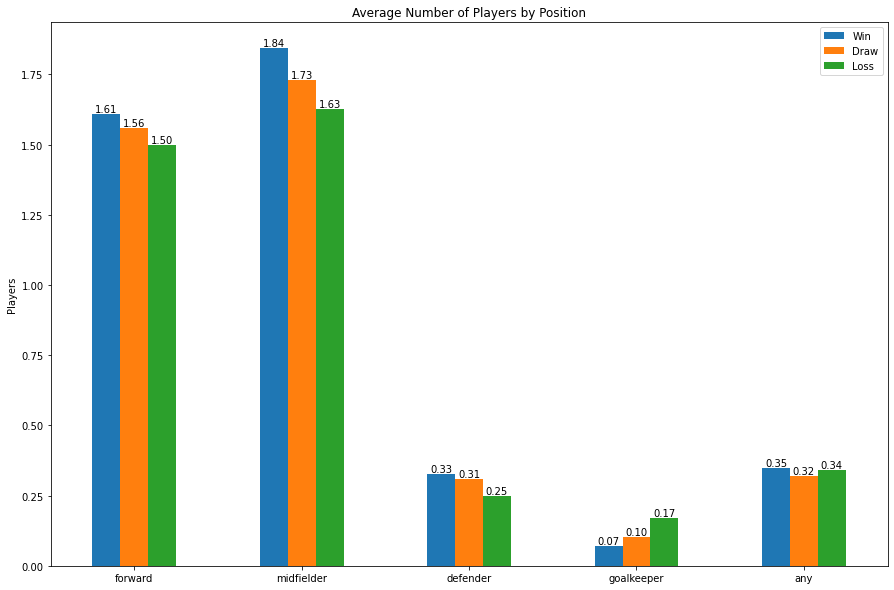

In [13]:
# transpose the DataFrame
match_players_transposed = match_players.T

# plot bar chart
ax = match_players_transposed.plot.bar(figsize=(15, 10), rot=0)

# set axis labels and title
ax.set_xlabel('')
ax.set_ylabel('Players')
ax.legend(['Win', 'Draw', 'Loss'])
ax.set_title('Average Number of Players by Position')

# display values above each bar
for p in ax.containers:
    ax.bar_label(p, label_type='edge', labels=[f'{v:.2f}' for v in p.datavalues])

# show plot
ax.set_facecolor('white')
plt.savefig('../Visualizations/Average Num Players by Position (Same Division).png',bbox_inches='tight', dpi=100 )
plt.show()


C:\Users\cjrad\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


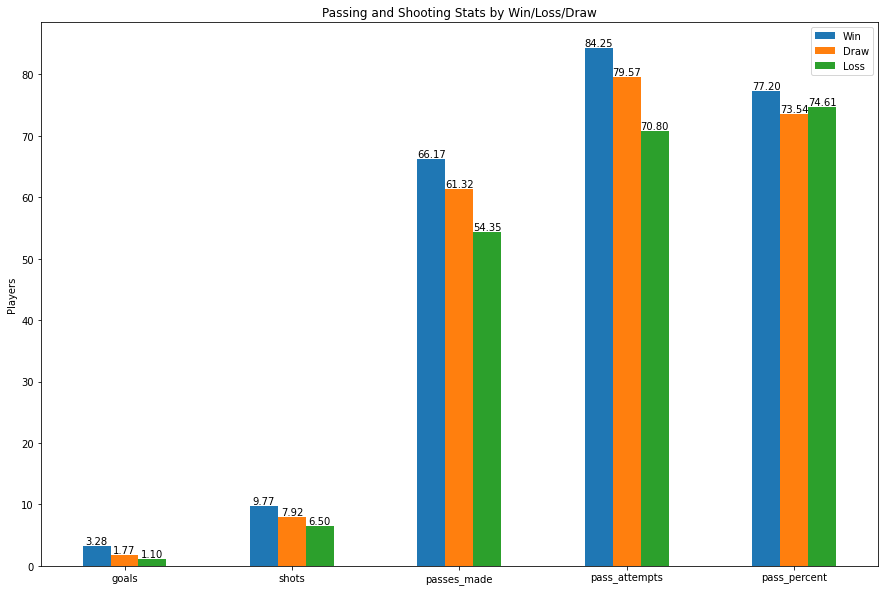

In [15]:
match_players = match_club_df_results[['goals', 'shots', 'passes_made', 'pass_attempts',
       'pass_percent']]

match_players['pass_percent'] = match_players['pass_percent'] *100

# transpose the DataFrame
match_players_transposed = match_players.T

# plot bar chart
ax = match_players_transposed.plot.bar(figsize=(15, 10), rot=0)

# set axis labels and title
ax.set_xlabel('')
ax.set_ylabel('Players')
ax.legend(['Win', 'Draw', 'Loss'])
ax.set_title('Passing and Shooting Stats by Win/Loss/Draw')

# display values above each bar
for p in ax.containers:
    ax.bar_label(p, label_type='edge', labels=[f'{v:.2f}' for v in p.datavalues])

# show plot
ax.patch.set_facecolor('white')
plt.savefig('../Visualizations/Passing & Shooting (Same Division).jpg', bbox_inches='tight', dpi=100)
plt.show()

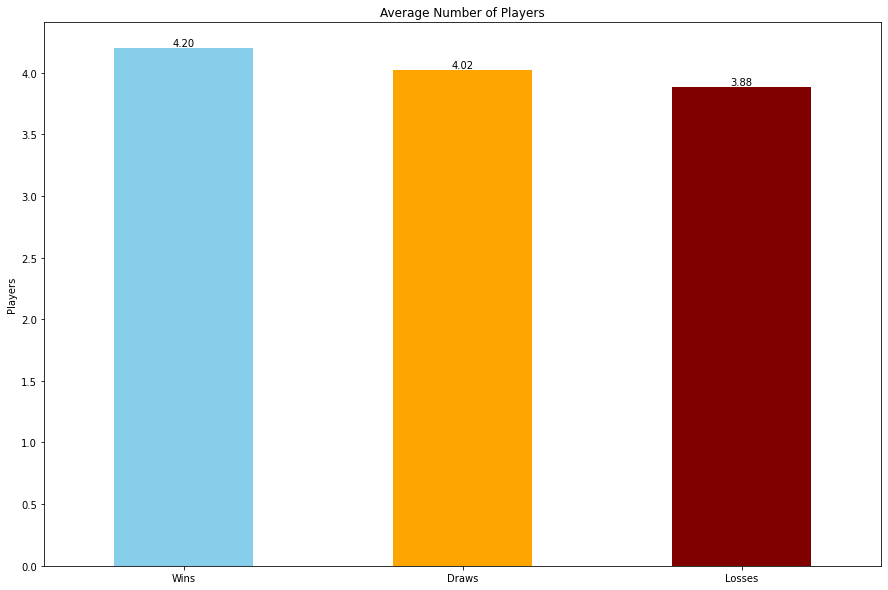

In [16]:

match_players = match_club_df_results['players_in_match']

# transpose the DataFrame
match_players_transposed = match_players.T

# define the colors for the bars
colors = {'Wins': 'blue', 'Draws': 'orange', 'Losses': 'green'}

# plot bar chart
ax = match_players_transposed.plot.bar(figsize=(15, 10), rot=0, color=['skyblue', 'orange', 'maroon'])

# set axis labels and title
ax.set_xlabel('')
ax.set_ylabel('Players')
ax.set_title('Average Number of Players')
ax.set_xticklabels(['Wins', 'Draws', 'Losses']) # use set_xticklabels instead of xticks to set tick labels

# display values above each bar
for p in ax.containers:
    ax.bar_label(p, label_type='edge', labels=[f'{v:.2f}' for v in p.datavalues])

# show plot
ax.patch.set_facecolor('white')
plt.savefig('../Visualizations/Average Num Players (Same Division).jpg',bbox_inches='tight', dpi=100 )
plt.show()